In [615]:
#import packages
from statsbombpy import sb
import pandas as pd


In [616]:
competitions_and_seasons = [
(11, 27, "2015/16 La Liga"),
(9, 27, "2015/16 Bundesliga"),
(2, 27, "2015/16 Premier League"),
(12, 27, "2015/16 Serie A"),
(7, 27, "2015/16 Ligue 1"),
(43, 106, "FIFA World Cup 22"),
(43, 3, "FIFA World Cup 18"),
(55, 282, "Euro 2024"),
(55, 43, "Euro 2020")  
]


önce bir lig için oyuncuların şu istatistiklerini toparla:
- pas sayısı
- pas başarı yüzdesi
- pasın kale doğrultusundaki mesafesi
- gole yol açan pas oranı
- şuta yol açan pas oranı
- 3.alana atılan pas miktarı
- pastan sonra oluşan şutun xgsi
- ceza sahasına atılan paslar

sonra bunu bütün ligler için yap ve de tableu atıp görseleştir

### **Match Data**

In [617]:
#laliga for döngüsü ile hepsini alıcaz
matches = sb.matches(competition_id=11, season_id=27)
matches.head(5)


/Users/emirysaglam/GitHub/Bitirme/.venv/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3825848,2015-09-23,20:00:00.000,Spain - La Liga,2015/2016,Levante UD,Eibar,2,2,available,...,None,5,Regular Season,Estadio Ciudad de Valencia,NaN,Luis Lucas Alcaraz González,José Luis Mendilibar Etxebarria,1.1.0,2,2
1,3825895,2015-09-23,22:00:00.000,Spain - La Liga,2015/2016,Las Palmas,Sevilla,2,0,available,...,None,5,Regular Season,Estadio de Gran Canaria,Carlos del Cerro Grande,Francisco Herrera Lorenzo,Unai Emery Etxegoien,1.1.0,2,2
2,3825894,2016-05-01,18:15:00.000,Spain - La Liga,2015/2016,RC Deportivo La Coruña,Getafe,0,2,available,...,None,36,Regular Season,Estadio Abanca-Riazor,Carlos Clos Gómez,Víctor Sánchez del Amo,Juan Eduardo Esnáider Belén,1.1.0,2,2
3,3825855,2016-05-02,20:30:00.000,Spain - La Liga,2015/2016,Málaga,Levante UD,3,1,available,...,None,36,Regular Season,Estadio La Rosaleda,Iñaki Bikandi Garrido,Javier Gracia Carlos,Joan Francesc Ferrer Sicilia,1.1.0,2,2
4,3825908,2016-05-15,19:00:00.000,Spain - La Liga,2015/2016,Espanyol,Eibar,4,2,available,...,None,38,Regular Season,RCDE Stadium,Mario Melero López,Constantin Gâlcă,José Luis Mendilibar Etxebarria,1.1.0,2,2


In [618]:
events_extra_info = matches[[
    "match_id",
    "match_date",
    "kick_off",
    "competition",
    "home_team",
    "away_team",
    "home_score",
    "away_score",
    "match_status",
    "match_week",
    "competition_stage",
    "referee",
    "home_managers",
    "away_managers",
]]
events_extra_info.head(5)

,match_id,match_date,kick_off,competition,home_team,away_team,home_score,away_score,match_status,match_week,competition_stage,referee,home_managers,away_managers
0,3825848,2015-09-23,20:00:00.000,Spain - La Liga,Levante UD,Eibar,2,2,available,5,Regular Season,NaN,Luis Lucas Alcaraz González,José Luis Mendilibar Etxebarria
1,3825895,2015-09-23,22:00:00.000,Spain - La Liga,Las Palmas,Sevilla,2,0,available,5,Regular Season,Carlos del Cerro Grande,Francisco Herrera Lorenzo,Unai Emery Etxegoien
2,3825894,2016-05-01,18:15:00.000,Spain - La Liga,RC Deportivo La Coruña,Getafe,0,2,available,36,Regular Season,Carlos Clos Gómez,Víctor Sánchez del Amo,Juan Eduardo Esnáider Belén
3,3825855,2016-05-02,20:30:00.000,Spain - La Liga,Málaga,Levante UD,3,1,available,36,Regular Season,Iñaki Bikandi Garrido,Javier Gracia Carlos,Joan Francesc Ferrer Sicilia
4,3825908,2016-05-15,19:00:00.000,Spain - La Liga,Espanyol,Eibar,4,2,available,38,Regular Season,Mario Melero López,Constantin Gâlcă,José Luis Mendilibar Etxebarria


In [619]:
events_df = sb.events(match_id=3825882)
events_df.columns

/Users/emirysaglam/GitHub/Bitirme/.venv/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Index(['bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'block_offensive',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_height', 'pass_inswinging', 'pass_length'

In [620]:
events_df = events_df.set_index("match_id").join(events_extra_info.set_index("match_id"),how="left", rsuffix='_match').reset_index()
events_df.head(5)

,match_id,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,home_team,away_team,home_score,away_score,match_status,match_week,competition_stage,referee,home_managers,away_managers
0,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo
1,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo
2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo
3,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo
4,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo


### **Posession Data**

In [621]:
events_df['timestamp'] = pd.to_datetime(events_df['timestamp'], format='%H:%M:%S.%f')



In [622]:
#events_df = events_df[events_df['timestamp']!="00:00:00.000"]
events_df.loc[events_df['minute'] >= 45, 'timestamp'] += pd.Timedelta(minutes=45)

#events_df['timestamp'] = pd.to_datetime(events_df['timestamp'], format='%H:%M:%S.%f')
test = events_df[["duration","kick_off","minute","timestamp","possession","possession_team"]].sort_values("timestamp")
#test = test[test["possession"]==103]
test.head(5)

,duration,kick_off,minute,timestamp,possession,possession_team
0,0.000000,19:30:00.000,0,1900-01-01 00:00:00.000,1,Atlético Madrid
1,0.000000,19:30:00.000,0,1900-01-01 00:00:00.000,1,Atlético Madrid
2,0.000000,19:30:00.000,0,1900-01-01 00:00:00.000,1,Atlético Madrid
3,0.000000,19:30:00.000,0,1900-01-01 00:00:00.000,1,Atlético Madrid
6,0.074312,19:30:00.000,0,1900-01-01 00:00:00.635,2,Atlético Madrid


In [623]:
possession_time = test.groupby("possession").apply(
    lambda x: (x["timestamp"].max() - x["timestamp"].min()).total_seconds(),include_groups=False
).reset_index(name="possession_time")

possession_time.head(5)

,possession,possession_time
0,1,0.000
1,2,18.672
2,3,6.338
3,4,14.437
4,5,4.427


In [624]:
events_df = events_df.set_index("possession").join(possession_time.set_index("possession"),how="left").reset_index()
events_df[events_df["possession"]==2][["duration","kick_off","minute","timestamp","player","team","type","possession","possession_team","possession_time"]].sort_values("timestamp").head(5)

,duration,kick_off,minute,timestamp,player,team,type,possession,possession_team,possession_time
6,0.074312,19:30:00.000,0,1900-01-01 00:00:00.635,Antoine Griezmann,Atlético Madrid,Pass,2,Atlético Madrid,18.672
2045,0.506245,19:30:00.000,0,1900-01-01 00:00:00.710,Fernando José Torres Sanz,Atlético Madrid,Carry,2,Atlético Madrid,18.672
1091,NaN,19:30:00.000,0,1900-01-01 00:00:00.710,Fernando José Torres Sanz,Atlético Madrid,Ball Receipt*,2,Atlético Madrid,18.672
7,1.174349,19:30:00.000,0,1900-01-01 00:00:01.216,Fernando José Torres Sanz,Atlético Madrid,Pass,2,Atlético Madrid,18.672
1092,NaN,19:30:00.000,0,1900-01-01 00:00:02.390,Augusto Matías Fernández,Atlético Madrid,Ball Receipt*,2,Atlético Madrid,18.672


### **Player Data**

In [625]:
players = (
    events_df[events_df["player"].notnull()][["player", "position", "team"]]
    .groupby("player")["position"]
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
)

players.head(5)

,player,position
0,Antoine Griezmann,Left Center Forward
1,Augusto Matías Fernández,Left Defensive Midfield
2,Carles Planas Antolínez,Left Back
3,Daniel Wass,Right Defensive Midfield
4,Diego Roberto Godín Leal,Left Center Back


In [626]:
# # Data as a list of dictionaries
# positions = [
#     {"Position Number": 1, "Position Abbreviation": "GK", "Position Name": "Goalkeeper"},
#     {"Position Number": 2, "Position Abbreviation": "RB", "Position Name": "Right Back"},
#     {"Position Number": 3, "Position Abbreviation": "RCB", "Position Name": "Right Center Back"},
#     {"Position Number": 4, "Position Abbreviation": "CB", "Position Name": "Center Back"},
#     {"Position Number": 5, "Position Abbreviation": "LCB", "Position Name": "Left Center Back"},
#     {"Position Number": 6, "Position Abbreviation": "LB", "Position Name": "Left Back"},
#     {"Position Number": 7, "Position Abbreviation": "RWB", "Position Name": "Right Wing Back"},
#     {"Position Number": 8, "Position Abbreviation": "LWB", "Position Name": "Left Wing Back"},
#     {"Position Number": 9, "Position Abbreviation": "RDM", "Position Name": "Right Defensive Midfield"},
#     {"Position Number": 10, "Position Abbreviation": "CDM", "Position Name": "Center Defensive Midfield"},
#     {"Position Number": 11, "Position Abbreviation": "LDM", "Position Name": "Left Defensive Midfield"},
#     {"Position Number": 12, "Position Abbreviation": "RM", "Position Name": "Right Midfield"},
#     {"Position Number": 13, "Position Abbreviation": "RCM", "Position Name": "Right Center Midfield"},
#     {"Position Number": 14, "Position Abbreviation": "CM", "Position Name": "Center Midfield"},
#     {"Position Number": 15, "Position Abbreviation": "LCM", "Position Name": "Left Center Midfield"},
#     {"Position Number": 16, "Position Abbreviation": "LM", "Position Name": "Left Midfield"},
#     {"Position Number": 17, "Position Abbreviation": "RW", "Position Name": "Right Wing"},
#     {"Position Number": 18, "Position Abbreviation": "RAM", "Position Name": "Right Attacking Midfield"},
#     {"Position Number": 19, "Position Abbreviation": "CAM", "Position Name": "Center Attacking Midfield"},
#     {"Position Number": 20, "Position Abbreviation": "LAM", "Position Name": "Left Attacking Midfield"},
#     {"Position Number": 21, "Position Abbreviation": "LW", "Position Name": "Left Wing"},
#     {"Position Number": 22, "Position Abbreviation": "RCF", "Position Name": "Right Center Forward"},
#     {"Position Number": 23, "Position Abbreviation": "ST ", "Position Name": "Striker"},
#     {"Position Number": 24, "Position Abbreviation": "LCF", "Position Name": "Left Center Forward"},
#     {"Position Number": 25, "Position Abbreviation": "SS", "Position Name": "Secondary Striker"},
#     {"Position Number": 26, "Position Abbreviation": "CF", "Position Name": "Center Forward"},

# ]

# # Create DataFrame
# positions_df = pd.DataFrame(positions)

# # Display DataFrame
# positions_df


In [627]:
# player_df = players.set_index("position").join(positions_df.set_index("Position Name"),how="left").reset_index()
# player_df

In [628]:
# player_df.drop(columns=["Position Number"],inplace=True)
# player_df.drop(columns=["Position Abbreviation"],inplace=True)

# #player_df.rename(columns={"Position Abbreviation": "position_abbreviaiton_most_played"},inplace=True)
# player_df.sort_values("player")

In [629]:
events_df = events_df.set_index("player").join(players.set_index("player"),how="left",rsuffix="_most_played").reset_index()
events_df[["player","position","position_most_played"]].tail(5)

,player,position,position_most_played
3811,Stefan Savić,Right Center Back,Right Center Back
3812,Jorge Resurrección Merodio,Left Midfield,Left Midfield
3813,Pedro Pablo Hernández,Left Defensive Midfield,Center Attacking Midfield
3814,Iago Aspas Juncal,Right Wing,Right Wing
3815,Filipe Luís Kasmirski,Left Back,Left Back


### Pass Data


In [630]:
#separate start and end locations from coordinates
events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)


In [631]:

passes = events_df[(events_df.type=="Pass")]
passes = passes[passes["pass_outcome"] != "Injury Clearance"]
events_df = events_df[((events_df.type=="Pass")&(events_df["pass_outcome"] == "Injury Clearance"))|(events_df.type!="Pass")]

passes

,player,possession,match_id,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,competition_stage,referee,home_managers,away_managers,possession_time,position_most_played,x,y,pass_end_x,pass_end_y
6,Antoine Griezmann,2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,18.672,Left Center Forward,60.0,40.0,58.2,40.8
7,Fernando José Torres Sanz,2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,18.672,Right Center Forward,57.6,39.2,39.2,36.5
8,Augusto Matías Fernández,2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,18.672,Left Defensive Midfield,44.0,40.0,86.5,12.5
9,Saúl Ñíguez Esclapez,2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,18.672,Right Midfield,86.5,12.5,101.4,35.2
10,Sergi Gómez Solà,2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,18.672,Left Center Back,18.7,44.9,41.2,29.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,Marcelo Alfonso Díaz Rojas,205,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,22.148,Left Defensive Midfield,89.0,48.4,103.6,67.4
1087,Iago Aspas Juncal,205,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,22.148,Right Wing,101.5,66.3,110.1,34.9
1088,Iago Aspas Juncal,205,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,22.148,Right Wing,95.2,62.3,87.1,46.0
1089,Marcelo Alfonso Díaz Rojas,205,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,22.148,Left Defensive Midfield,85.7,35.7,90.3,16.7


In [632]:
shots_fromPass = events_df[(events_df.type=="Shot")][["player","shot_type","shot_key_pass_id","shot_outcome","shot_statsbomb_xg"]]

In [633]:
events_df[(events_df.type=="Shot")][["player","shot_type","shot_key_pass_id","shot_outcome","shot_statsbomb_xg"]]

,player,shot_type,shot_key_pass_id,shot_outcome,shot_statsbomb_xg
3690,Saúl Ñíguez Esclapez,Open Play,NaN,Saved,0.045746
3691,Diego Roberto Godín Leal,Open Play,e14cd9d3-f5ff-4d20-ab3f-1ebbf4f06635,Post,0.083062
3692,Marcelo Alfonso Díaz Rojas,Open Play,NaN,Blocked,0.042978
3693,Marcelo Alfonso Díaz Rojas,Open Play,NaN,Blocked,0.067184
3694,John Guidetti,Open Play,NaN,Blocked,0.058636
3695,Saúl Ñíguez Esclapez,Open Play,0e429bbc-4694-47b8-896e-e493d012c721,Saved,0.040346
3696,Fabián Ariel Orellana Valenzuela,Open Play,3b3726c6-3867-488d-804d-8868b66f631c,Saved,0.087138
3697,Manuel Agudo Durán,Free Kick,NaN,Saved,0.039078
3698,Fernando José Torres Sanz,Open Play,NaN,Goal,0.165797
3699,Fernando José Torres Sanz,Open Play,c43f8899-41bf-4ec6-a0d4-adf9b68a3f23,Post,0.076876


In [634]:
shots_fromPass["shot_outcome"].unique()

array(['Saved', 'Post', 'Blocked', 'Goal', 'Off T'], dtype=object)

In [635]:
passes_M = passes.set_index("id").join(shots_fromPass.set_index("shot_key_pass_id"),how="left",rsuffix='_shotFromPass').reset_index()
passes_M.shape

(1085, 113)

In [636]:
pd.options.display.max_rows = 90 # this will set limit of columns to 500

passes_M[passes_M.pass_outcome.isna()][["pass_outcome",'x', 'y', 'pass_end_x', 'pass_end_y',
       'player_shotFromPass', 'shot_type_shotFromPass',
       'shot_outcome_shotFromPass', 'shot_statsbomb_xg_shotFromPass']]#??????????????

,pass_outcome,x,y,pass_end_x,pass_end_y,player_shotFromPass,shot_type_shotFromPass,shot_outcome_shotFromPass,shot_statsbomb_xg_shotFromPass
0,NaN,60.0,40.0,58.2,40.8,NaN,NaN,NaN,NaN
1,NaN,57.6,39.2,39.2,36.5,NaN,NaN,NaN,NaN
2,NaN,44.0,40.0,86.5,12.5,NaN,NaN,NaN,NaN
5,NaN,78.5,48.7,92.7,64.6,NaN,NaN,NaN,NaN
6,NaN,97.5,64.6,103.2,36.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1076,NaN,27.9,31.3,35.8,11.5,NaN,NaN,NaN,NaN
1080,NaN,89.0,48.4,103.6,67.4,NaN,NaN,NaN,NaN
1082,NaN,95.2,62.3,87.1,46.0,NaN,NaN,NaN,NaN
1083,NaN,85.7,35.7,90.3,16.7,NaN,NaN,NaN,NaN


In [637]:
passes_M[passes_M.pass_outcome.isna()]["shot_outcome_shotFromPass"].unique() #??????????????

array([nan, 'Post', 'Saved', 'Blocked', 'Off T'], dtype=object)

In [638]:
passes_M = passes_M[passes_M["pass_outcome"] != "Injury Clearance"]


In [639]:
passes_M["shot_outcome_shotFromPass"].notna()

0       False
1       False
2       False
3       False
4       False
        ...  
1080    False
1081    False
1082    False
1083    False
1084     True
Name: shot_outcome_shotFromPass, Length: 1085, dtype: bool

In [640]:
# Identify passes 
passes_M["pass_succes"] = passes_M.pass_outcome.isna()

# Make a copy of the original DataFrame to work with
passes_M["f3rd_pass"] = (passes_M.x < 80) & (passes_M.pass_end_x > 80)

# Calculate pass progression
passes_M["pass_progression"] = passes_M["x"] - passes_M["pass_end_x"]
passes_M.loc[passes_M.pass_outcome.notna(), "pass_progression"] = None

# Identify shot-assisted passes
passes_M["shot_assisted_pass"] = passes_M.pass_outcome.isna() &  passes_M["shot_outcome_shotFromPass"].notna()


# Identify goal-assisted passes
passes_M["goal_assisted_pass"] = passes_M.pass_outcome.isna() & passes_M["shot_outcome_shotFromPass"] == "Goal"

# Identify crosses (başarılı orta)!!!!!
passes_M["cross"] = (passes_M.pass_cross == True)

# Identify box passes
passes_M["box_pass"] = (
    (passes_M.x < 102)
    & ((passes_M.y < 18) | (passes_M.y > 62))
    & (passes_M.pass_end_x > 102)
    & ((passes_M.pass_end_y > 18) | (passes_M.pass_end_y < 62))
)



# The updated DataFrame now has all the new columns with boolean values
passes_M

,id,player,possession,match_id,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,...,shot_type_shotFromPass,shot_outcome_shotFromPass,shot_statsbomb_xg_shotFromPass,pass_succes,f3rd_pass,pass_progression,shot_assisted_pass,goal_assisted_pass,cross,box_pass
0,a347f358-89cb-4b39-8388-2c7225960978,Antoine Griezmann,2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,False,1.8,False,False,False,False
1,55330ba9-7a95-4e27-87bc-f60218723e4a,Fernando José Torres Sanz,2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,False,18.4,False,False,False,False
2,88ed898a-f31d-460e-a161-4234082b379a,Augusto Matías Fernández,2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,True,-42.5,False,False,False,False
3,3b0e9f94-b90b-484d-941a-608560bab675,Saúl Ñíguez Esclapez,2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,False,NaN,False,False,False,False
4,f337944f-b786-4133-b0bf-438f9ca2d908,Sergi Gómez Solà,2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,False,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,6c85ca75-2ee1-4065-8bc2-2117006593a7,Marcelo Alfonso Díaz Rojas,205,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,False,-14.6,False,False,False,False
1081,e9ce1436-2500-417f-9c18-ee113e271a58,Iago Aspas Juncal,205,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,False,NaN,False,False,True,True
1082,afacc587-b396-4a5c-9365-548f4243351a,Iago Aspas Juncal,205,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,False,8.1,False,False,False,False
1083,f17881da-7dad-4700-b03c-94af55cc6284,Marcelo Alfonso Díaz Rojas,205,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,False,-4.6,False,False,False,False


<Axes: >

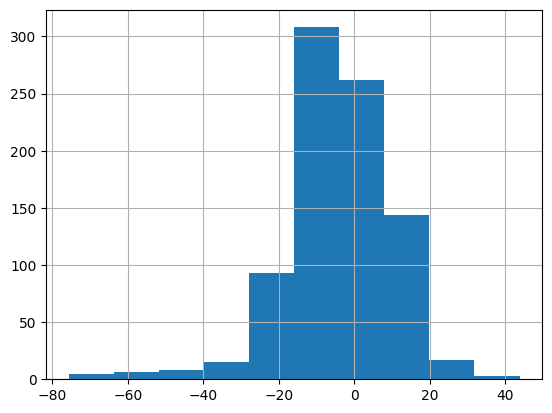

In [641]:
passes_M["pass_progression"].hist()

In [642]:
for i in passes_M.columns:
    print(i)

id
player
possession
match_id
bad_behaviour_card
ball_receipt_outcome
ball_recovery_recovery_failure
block_offensive
carry_end_location
clearance_aerial_won
clearance_body_part
clearance_head
clearance_left_foot
clearance_right_foot
counterpress
dribble_nutmeg
dribble_outcome
dribble_overrun
duel_outcome
duel_type
duration
foul_committed_advantage
foul_committed_card
foul_committed_offensive
foul_won_advantage
foul_won_defensive
goalkeeper_body_part
goalkeeper_end_location
goalkeeper_outcome
goalkeeper_position
goalkeeper_technique
goalkeeper_type
index
interception_outcome
location
minute
miscontrol_aerial_won
off_camera
out
pass_aerial_won
pass_angle
pass_assisted_shot_id
pass_body_part
pass_cross
pass_cut_back
pass_end_location
pass_height
pass_inswinging
pass_length
pass_no_touch
pass_outcome
pass_outswinging
pass_recipient
pass_recipient_id
pass_shot_assist
pass_straight
pass_switch
pass_technique
pass_through_ball
pass_type
period
play_pattern
player_id
position
possession_team
p

In [643]:
player_df

,position,player
0,Left Center Forward,Antoine Griezmann
1,Left Defensive Midfield,Augusto Matías Fernández
2,Left Back,Carles Planas Antolínez
3,Right Defensive Midfield,Daniel Wass
4,Left Center Back,Diego Roberto Godín Leal
5,Right Wing,Fabián Ariel Orellana Valenzuela
6,Right Center Forward,Fernando José Torres Sanz
7,Left Back,Filipe Luís Kasmirski
8,Right Defensive Midfield,Gabriel Fernández Arenas
9,Right Center Back,Hugo Mallo Novegil


In [644]:
passes_M = passes_M.set_index("pass_recipient").join(players.set_index("player"),how="left",rsuffix="_re_most_played").reset_index()
passes_M.columns

passes_M[["player","position","position_most_played","pass_recipient",'position_re_most_played']]

,player,position,position_most_played,pass_recipient,position_re_most_played
0,Antoine Griezmann,Left Center Forward,Left Center Forward,Fernando José Torres Sanz,Right Center Forward
1,Fernando José Torres Sanz,Right Center Forward,Right Center Forward,Augusto Matías Fernández,Left Defensive Midfield
2,Augusto Matías Fernández,Left Defensive Midfield,Left Defensive Midfield,Saúl Ñíguez Esclapez,Right Midfield
3,Saúl Ñíguez Esclapez,Right Midfield,Right Midfield,Antoine Griezmann,Left Center Forward
4,Sergi Gómez Solà,Left Center Back,Left Center Back,NaN,NaN
...,...,...,...,...,...
1080,Marcelo Alfonso Díaz Rojas,Right Defensive Midfield,Left Defensive Midfield,Iago Aspas Juncal,Right Wing
1081,Iago Aspas Juncal,Right Wing,Right Wing,NaN,NaN
1082,Iago Aspas Juncal,Right Wing,Right Wing,Marcelo Alfonso Díaz Rojas,Left Defensive Midfield
1083,Marcelo Alfonso Díaz Rojas,Right Defensive Midfield,Left Defensive Midfield,Manuel Agudo Durán,Left Wing


In [645]:
passes_M["player"]

0                Antoine Griezmann
1        Fernando José Torres Sanz
2         Augusto Matías Fernández
3             Saúl Ñíguez Esclapez
4                 Sergi Gómez Solà
                   ...            
1080    Marcelo Alfonso Díaz Rojas
1081             Iago Aspas Juncal
1082             Iago Aspas Juncal
1083    Marcelo Alfonso Díaz Rojas
1084    Jorge Resurrección Merodio
Name: player, Length: 1085, dtype: object

In [646]:
columns_to_use = [ 
    'type',
    'x',
    'y',
    'pass_end_x',
    'pass_end_y',
    'shot_outcome_shotFromPass',
    'shot_statsbomb_xg_shotFromPass',
    'pass_succes',
    'f3rd_pass',
    'pass_progression',
    'shot_assisted_pass',
    'goal_assisted_pass',
    'cross',
    'box_pass',
]

passes_M[passes_M["player"]=="Antoine Griezmann"][columns_to_use]


,type,x,y,pass_end_x,pass_end_y,shot_outcome_shotFromPass,shot_statsbomb_xg_shotFromPass,pass_succes,f3rd_pass,pass_progression,shot_assisted_pass,goal_assisted_pass,cross,box_pass
0,Pass,60.0,40.0,58.2,40.8,NaN,NaN,True,False,1.8,False,False,False,False
7,Pass,101.8,34.8,103.2,43.1,NaN,NaN,True,False,-1.4,False,False,False,False
43,Pass,44.0,14.8,30.0,13.6,NaN,NaN,True,False,14.0,False,False,False,False
60,Pass,59.0,9.9,47.4,6.3,NaN,NaN,True,False,11.6,False,False,False,False
165,Pass,62.6,21.5,59.9,32.3,NaN,NaN,True,False,2.7,False,False,False,False
168,Pass,72.3,10.2,67.5,11.0,NaN,NaN,False,False,NaN,False,False,False,False
171,Pass,68.7,8.7,62.6,4.6,NaN,NaN,True,False,6.1,False,False,False,False
217,Pass,72.3,32.8,64.4,34.3,NaN,NaN,True,False,7.9,False,False,False,False
270,Pass,80.6,6.6,69.4,3.9,NaN,NaN,True,False,11.2,False,False,False,False
283,Pass,77.9,42.1,96.0,21.5,NaN,NaN,False,True,NaN,False,False,False,False


### Foul Data


In [647]:
foul_commited = events_df[(events_df.type=="Foul Committed")][["id","player","position","team","timestamp","minute","type","foul_committed_advantage","foul_committed_card","x","y"]]

print(foul_commited.shape[0])
foul_commited.tail(10)


33


,id,player,position,team,timestamp,minute,type,foul_committed_advantage,foul_committed_card,x,y
3751,414d0c74-4827-430e-a72a-5ad0db339b67,Augusto Matías Fernández,Left Defensive Midfield,Atlético Madrid,1900-01-01 01:10:22.009,70,Foul Committed,NaN,NaN,62.5,26.3
3752,d261f8de-40bb-45fd-ac91-31c35bfa888e,Saúl Ñíguez Esclapez,Right Midfield,Atlético Madrid,1900-01-01 01:15:35.256,75,Foul Committed,NaN,NaN,81.9,74.0
3753,cb34877c-028a-4d18-bfe2-511b3462dea8,Manuel Agudo Durán,Center Attacking Midfield,Celta Vigo,1900-01-01 01:17:30.263,77,Foul Committed,NaN,NaN,74.9,1.8
3754,9d7336ca-e218-482e-9e99-996a90cd8ed5,Tiago Cardoso Mendes,Right Center Forward,Atlético Madrid,1900-01-01 01:19:00.928,79,Foul Committed,NaN,NaN,76.2,66.1
3755,b2d7cca3-8a55-45b6-833d-d9c1e6d87a4e,Hugo Mallo Novegil,Right Center Back,Celta Vigo,1900-01-01 01:19:53.217,79,Foul Committed,NaN,Yellow Card,20.6,72.9
3756,3790a9dd-67a0-48b5-8706-20845a9dae0d,Saúl Ñíguez Esclapez,Right Midfield,Atlético Madrid,1900-01-01 01:22:27.987,82,Foul Committed,NaN,NaN,100.9,15.1
3757,269d0864-6dfb-4015-86d6-e2d6aeab7b4e,Iago Aspas Juncal,Right Wing,Celta Vigo,1900-01-01 01:23:07.546,83,Foul Committed,NaN,NaN,110.4,7.2
3758,5dc42404-b3c9-4518-b6b0-45dce7d51672,Gabriel Fernández Arenas,Right Center Midfield,Atlético Madrid,1900-01-01 01:24:49.125,84,Foul Committed,NaN,NaN,86.5,72.3
3759,33dadcbf-3929-48d9-a644-27ab3bc67f33,Hugo Mallo Novegil,Right Center Back,Celta Vigo,1900-01-01 01:28:49.055,88,Foul Committed,NaN,NaN,7.3,7.7
3760,3b363bc1-dbec-4e43-96d8-7d1abdd0b44b,Gabriel Fernández Arenas,Right Center Midfield,Atlético Madrid,1900-01-01 01:31:32.187,91,Foul Committed,NaN,NaN,32.3,73.3


In [648]:
existing_columns = set(events_df.columns)
# Set of columns you want to check
columns_to_check = {"foul_committed_advantage", "foul_committed_card"}
# Find which columns exist and which do not
missing = columns_to_check - existing_columns
if len(missing) == 0:
    foul_commited = events_df[(events_df.type == "Foul Committed")][
    ["id", "type", "player", "position","team","timestamp","minute", "foul_committed_advantage", "foul_committed_card", "x", "y"]
    ].set_index("id")
elif len(missing) > 1:
    print("there was no commited advantage nor commited card in this match ")
    foul_commited = events_df[(events_df.type == "Foul Committed")][
        ["id", "type", "player","position","team","timestamp","minute", "x", "y"]]
    foul_commited["foul_committed_advantage_foul_commitedJ"] = None
    foul_commited["foul_committed_card_foul_commitedJ"] = None
    foul_commited = foul_commited.set_index("id")
elif "foul_committed_card" in missing:
    print("there was no commited card in this match ")
    foul_commited = events_df[(events_df.type == "Foul Committed")][
        ["id", "type", "player","position","team","timestamp","minute", "foul_committed_advantage", "x", "y"]]
    foul_commited["foul_committed_card_foul_commitedJ"] = None
    foul_commited = foul_commited.set_index("id")
elif "foul_committed_advantage" in missing:
    print("there was no commited advantage in this match ")
    foul_commited = events_df[(events_df.type == "Foul Committed")][
        ["id", "type", "player","position","team","timestamp","minute", "foul_committed_card", "x", "y"]]
    foul_commited["foul_committed_advantage_foul_commitedJ"] = None
    foul_commited = foul_commited.set_index("id")

foul_commited.tail(10)




,type,player,position,team,timestamp,minute,foul_committed_advantage,foul_committed_card,x,y
id,,,,,,,,,,
414d0c74-4827-430e-a72a-5ad0db339b67,Foul Committed,Augusto Matías Fernández,Left Defensive Midfield,Atlético Madrid,1900-01-01 01:10:22.009,70,NaN,NaN,62.5,26.3
d261f8de-40bb-45fd-ac91-31c35bfa888e,Foul Committed,Saúl Ñíguez Esclapez,Right Midfield,Atlético Madrid,1900-01-01 01:15:35.256,75,NaN,NaN,81.9,74.0
cb34877c-028a-4d18-bfe2-511b3462dea8,Foul Committed,Manuel Agudo Durán,Center Attacking Midfield,Celta Vigo,1900-01-01 01:17:30.263,77,NaN,NaN,74.9,1.8
9d7336ca-e218-482e-9e99-996a90cd8ed5,Foul Committed,Tiago Cardoso Mendes,Right Center Forward,Atlético Madrid,1900-01-01 01:19:00.928,79,NaN,NaN,76.2,66.1
b2d7cca3-8a55-45b6-833d-d9c1e6d87a4e,Foul Committed,Hugo Mallo Novegil,Right Center Back,Celta Vigo,1900-01-01 01:19:53.217,79,NaN,Yellow Card,20.6,72.9
3790a9dd-67a0-48b5-8706-20845a9dae0d,Foul Committed,Saúl Ñíguez Esclapez,Right Midfield,Atlético Madrid,1900-01-01 01:22:27.987,82,NaN,NaN,100.9,15.1
269d0864-6dfb-4015-86d6-e2d6aeab7b4e,Foul Committed,Iago Aspas Juncal,Right Wing,Celta Vigo,1900-01-01 01:23:07.546,83,NaN,NaN,110.4,7.2
5dc42404-b3c9-4518-b6b0-45dce7d51672,Foul Committed,Gabriel Fernández Arenas,Right Center Midfield,Atlético Madrid,1900-01-01 01:24:49.125,84,NaN,NaN,86.5,72.3
33dadcbf-3929-48d9-a644-27ab3bc67f33,Foul Committed,Hugo Mallo Novegil,Right Center Back,Celta Vigo,1900-01-01 01:28:49.055,88,NaN,NaN,7.3,7.7


In [649]:
fouls = events_df[(events_df["type"]=="Foul Won")].explode("related_events")
events_df = events_df[~((events_df["type"]=="Foul Won") | (events_df["type"]=="Foul Committed"))]
fouls.tail(5)

,player,possession,match_id,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,competition_stage,referee,home_managers,away_managers,possession_time,position_most_played,x,y,pass_end_x,pass_end_y
3790,Jorge Resurrección Merodio,186,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,7.979,Left Midfield,9.7,72.9,NaN,NaN
3791,Nemanja Radoja,188,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,30.798,Left Defensive Midfield,33.6,7.8,NaN,NaN
3792,Diego Roberto Godín Leal,196,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,21.288,Left Center Back,112.8,72.4,NaN,NaN
3792,Diego Roberto Godín Leal,196,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,21.288,Left Center Back,112.8,72.4,NaN,NaN
3793,Théo Bongonda Mbul''Ofeko Batombo,203,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,11.724,Left Wing,87.8,6.8,NaN,NaN


In [650]:
fouls_M = fouls.set_index("related_events").join(foul_commited,how="left", rsuffix='_foul_commitedJ')
fouls_M = fouls_M[fouls_M["player_foul_commitedJ"].notna()].reset_index()

fouls_M[
    ["id", "type", "player", "position","team","timestamp","minute","type", "player_foul_commitedJ","position_foul_commitedJ","foul_committed_advantage_foul_commitedJ","foul_committed_card_foul_commitedJ", "x", "y"]
    ].tail(5)

,id,type,player,position,team,timestamp,minute,type,player_foul_commitedJ,position_foul_commitedJ,foul_committed_advantage_foul_commitedJ,foul_committed_card_foul_commitedJ,x,y
28,68fa02f3-dbf9-43d6-b649-aa34a8badce2,Foul Won,Jonathan Castro Otto,Right Back,Celta Vigo,1900-01-01 01:22:27.987,82,Foul Won,Saúl Ñíguez Esclapez,Right Midfield,NaN,NaN,19.2,65.0
29,5db7d66b-ca93-43f4-ba32-de6f8eddbc4c,Foul Won,Jorge Resurrección Merodio,Left Midfield,Atlético Madrid,1900-01-01 01:23:07.546,83,Foul Won,Iago Aspas Juncal,Right Wing,NaN,NaN,9.7,72.9
30,d0db5cad-c4f4-4fe2-baad-2744b62081a0,Foul Won,Nemanja Radoja,Left Defensive Midfield,Celta Vigo,1900-01-01 01:24:49.125,84,Foul Won,Gabriel Fernández Arenas,Right Center Midfield,NaN,NaN,33.6,7.8
31,c007809b-149f-40a1-8d32-a42091f4dc18,Foul Won,Diego Roberto Godín Leal,Left Center Back,Atlético Madrid,1900-01-01 01:28:49.055,88,Foul Won,Hugo Mallo Novegil,Right Center Back,NaN,NaN,112.8,72.4
32,4e653a83-fed2-45ab-8820-1c67976294ef,Foul Won,Théo Bongonda Mbul''Ofeko Batombo,Left Wing,Celta Vigo,1900-01-01 01:31:32.187,91,Foul Won,Gabriel Fernández Arenas,Right Center Midfield,NaN,NaN,87.8,6.8


In [651]:
fouls_M[["player","position","team","timestamp","minute","type","player_foul_commitedJ","team_foul_commitedJ",'timestamp_foul_commitedJ', 'minute_foul_commitedJ',
       'type_foul_commitedJ', 'player_foul_commitedJ',
       'position_foul_commitedJ', 
       'foul_committed_advantage_foul_commitedJ',
       'foul_committed_card_foul_commitedJ', 'x_foul_commitedJ',
       'y_foul_commitedJ']].tail(5)

,player,position,team,timestamp,minute,type,player_foul_commitedJ,team_foul_commitedJ,timestamp_foul_commitedJ,minute_foul_commitedJ,type_foul_commitedJ,player_foul_commitedJ,position_foul_commitedJ,foul_committed_advantage_foul_commitedJ,foul_committed_card_foul_commitedJ,x_foul_commitedJ,y_foul_commitedJ
28,Jonathan Castro Otto,Right Back,Celta Vigo,1900-01-01 01:22:27.987,82,Foul Won,Saúl Ñíguez Esclapez,Atlético Madrid,1900-01-01 01:22:27.987,82.0,Foul Committed,Saúl Ñíguez Esclapez,Right Midfield,NaN,NaN,100.9,15.1
29,Jorge Resurrección Merodio,Left Midfield,Atlético Madrid,1900-01-01 01:23:07.546,83,Foul Won,Iago Aspas Juncal,Celta Vigo,1900-01-01 01:23:07.546,83.0,Foul Committed,Iago Aspas Juncal,Right Wing,NaN,NaN,110.4,7.2
30,Nemanja Radoja,Left Defensive Midfield,Celta Vigo,1900-01-01 01:24:49.125,84,Foul Won,Gabriel Fernández Arenas,Atlético Madrid,1900-01-01 01:24:49.125,84.0,Foul Committed,Gabriel Fernández Arenas,Right Center Midfield,NaN,NaN,86.5,72.3
31,Diego Roberto Godín Leal,Left Center Back,Atlético Madrid,1900-01-01 01:28:49.055,88,Foul Won,Hugo Mallo Novegil,Celta Vigo,1900-01-01 01:28:49.055,88.0,Foul Committed,Hugo Mallo Novegil,Right Center Back,NaN,NaN,7.3,7.7
32,Théo Bongonda Mbul''Ofeko Batombo,Left Wing,Celta Vigo,1900-01-01 01:31:32.187,91,Foul Won,Gabriel Fernández Arenas,Atlético Madrid,1900-01-01 01:31:32.187,91.0,Foul Committed,Gabriel Fernández Arenas,Right Center Midfield,NaN,NaN,32.3,73.3


In [652]:

# Convert columns to sets
set1 = set(events_df['id'])
set2 = set(passes_M['id'])
set3 = set(fouls_M['id'])

# Find common values using set intersection
common_values12 = set1 & set2 
print("Common values 1-2:", common_values12)

common_values13 = set1 & set3 
print("Common values 1-3:", common_values13)

common_values23 = set2 & set3 
print("Common values 2-3:", common_values23)




Common values 1-2: set()
Common values 1-3: set()
Common values 2-3: set()


In [653]:

# Convert columns to sets
set1 = set(events_df.columns)
set2 = set(passes_M.columns)
set3 = set(fouls_M.columns)

# Find common values using set intersection
common_values12 = set1 & set2 
print("Common values 1-2:", common_values12)

common_values13 = set1 & set3 
print("Common values 1-3:", common_values13)

common_values23 = set2 & set3 
print("Common values 2-3:", common_values23)




Common values 1-2: {'location', 'shot_technique', 'pass_end_y', 'competition_stage', 'home_team', 'pass_body_part', 'foul_committed_offensive', 'related_events', 'pass_cut_back', 'possession', 'home_score', 'shot_body_part', 'period', 'possession_team', 'pass_through_ball', 'clearance_aerial_won', 'shot_one_on_one', 'clearance_head', 'tactics', 'shot_freeze_frame', 'y', 'pass_angle', 'team', 'duel_type', 'position_most_played', 'pass_type', 'home_managers', 'goalkeeper_end_location', 'pass_straight', 'under_pressure', 'pass_assisted_shot_id', 'ball_recovery_recovery_failure', 'index', 'pass_cross', 'goalkeeper_type', 'substitution_replacement', 'substitution_outcome', 'shot_open_goal', 'block_offensive', 'pass_technique', 'referee', 'ball_receipt_outcome', 'play_pattern', 'match_date', 'shot_end_location', 'foul_won_advantage', 'shot_first_time', 'pass_no_touch', 'goalkeeper_position', 'pass_recipient', 'x', 'match_week', 'pass_length', 'pass_outcome', 'away_managers', 'team_id', 'shot

In [654]:
# Find duplicate column names
duplicate_columns = [col for col in fouls_M.columns if list(fouls_M.columns).count(col) > 1]

# Get unique duplicate column names
unique_duplicates = set(duplicate_columns)

print("Duplicate column names:", unique_duplicates)

Duplicate column names: set()


In [655]:
events_df.set_index("id",inplace=True)
passes_M.set_index("id",inplace=True)
fouls_M.set_index("id",inplace=True)


In [656]:
events_df = pd.concat([events_df,passes_M,fouls_M])


In [657]:
events_df[events_df["type"]=="Foul Won"]

,player,possession,match_id,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,type_foul_commitedJ,player_foul_commitedJ,position_foul_commitedJ,team_foul_commitedJ,timestamp_foul_commitedJ,minute_foul_commitedJ,foul_committed_advantage_foul_commitedJ,foul_committed_card_foul_commitedJ,x_foul_commitedJ,y_foul_commitedJ
id,,,,,,,,,,,,,,,,,,,,,
4091623f-e56b-4e79-b49c-04341a4d1a0f,Fernando José Torres Sanz,26,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Foul Committed,Sergi Gómez Solà,Left Center Back,Celta Vigo,1900-01-01 00:10:34.036,10.0,NaN,NaN,50.5,30.4
252acb07-42c3-4a2c-84ab-4d3686aa9cd2,Daniel Wass,31,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Foul Committed,Diego Roberto Godín Leal,Left Center Back,Atlético Madrid,1900-01-01 00:13:56.463,13.0,NaN,NaN,56.7,21.2
add597e6-93ae-4305-845e-1d087e646020,Daniel Wass,41,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Foul Committed,Jorge Resurrección Merodio,Left Midfield,Atlético Madrid,1900-01-01 00:17:27.164,17.0,NaN,NaN,74.6,29.1
02187366-ab48-4eb0-b3ff-ba45248cdbc7,Antoine Griezmann,47,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Foul Committed,Marcelo Alfonso Díaz Rojas,Left Defensive Midfield,Celta Vigo,1900-01-01 00:19:50.549,19.0,NaN,NaN,39.9,67.3
7bf694ee-064b-4152-8dbe-984dd4a5e23b,Antoine Griezmann,55,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Foul Committed,Jonathan Castro Otto,Right Back,Celta Vigo,1900-01-01 00:23:07.707,23.0,NaN,NaN,48.9,53.4
36f6a22b-647f-47d4-9f15-4c70c4bf3614,Augusto Matías Fernández,61,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Foul Committed,Manuel Agudo Durán,Left Wing,Celta Vigo,1900-01-01 00:25:54.317,25.0,NaN,NaN,56.6,14.4
c81d2d40-726a-4e19-9cb4-2cede1dd5fd5,Fabián Ariel Orellana Valenzuela,65,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Foul Committed,Jorge Resurrección Merodio,Left Midfield,Atlético Madrid,1900-01-01 00:27:19.498,27.0,NaN,NaN,86.1,47.1
726b7b7c-ce53-453b-8afa-fa389279e403,Manuel Agudo Durán,73,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Foul Committed,Juan Francisco Torres Belén,Right Back,Atlético Madrid,1900-01-01 00:29:59.298,29.0,NaN,NaN,82.7,73.6
b9f43cb0-5da7-45c0-9894-69dbeec09b58,John Guidetti,75,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Foul Committed,Stefan Savić,Right Center Back,Atlético Madrid,1900-01-01 00:31:32.860,31.0,NaN,NaN,48.5,74.0


In [ ]:
events_df.columns

### **Test for Passing Networks**

In [603]:
def event_data_creation(events_extra_info,match_ID):
    
    events_df = sb.events(match_id=match_ID)
    events_df = events_df.set_index("match_id").join(events_extra_info.set_index("match_id"),how="left", rsuffix='_match').reset_index()
    #events_df.set_index("id")

    events_df['timestamp'] = pd.to_datetime(events_df['timestamp'], format='%H:%M:%S.%f')
    events_df.loc[events_df['minute'] >= 45, 'timestamp'] += pd.Timedelta(minutes=45)
    posessions_sorted = events_df[["duration","kick_off","minute","timestamp","possession","possession_team"]].sort_values("timestamp")
    possession_time = posessions_sorted.groupby("possession").apply(
        lambda x: (x["timestamp"].max() - x["timestamp"].min()).total_seconds(),include_groups=False
    ).reset_index(name="possession_time")
    events_df = events_df.set_index("possession").join(possession_time.set_index("possession"),how="left").reset_index()

    players = (
        events_df[events_df["player"].notnull()][["player", "position", "team"]]
        .groupby("player")["position"]
        .agg(lambda x: x.value_counts().idxmax())
        .reset_index()
    )
    events_df = events_df.set_index("player").join(players.set_index("player"),how="left",rsuffix="_most_played").reset_index()

    events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
    events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)
    passes = events_df[(events_df.type=="Pass")]
    passes = passes[passes["pass_outcome"] != "Injury Clearance"]
    events_df = events_df[((events_df.type=="Pass")&(events_df["pass_outcome"] == "Injury Clearance"))|(events_df.type!="Pass")]
    shots_fromPass = events_df[(events_df.type=="Shot")][["player","shot_type","shot_key_pass_id","shot_outcome","shot_statsbomb_xg"]]
    passes_M = passes.set_index("id").join(shots_fromPass.set_index("shot_key_pass_id"),how="left",rsuffix='_shotFromPass').reset_index()
    passes_M["pass_succes"] = passes_M.pass_outcome.isna()
    passes_M["f3rd_pass"] = (passes_M.x < 80) & (passes_M.pass_end_x > 80)
    passes_M["pass_progression"] = passes_M["x"] - passes_M["pass_end_x"]
    passes_M.loc[passes_M.pass_outcome.notna(), "pass_progression"] = None
    passes_M["shot_assisted_pass"] = passes_M.pass_outcome.isna() &  passes_M["shot_outcome_shotFromPass"].notna()
    passes_M["goal_assisted_pass"] = passes_M.pass_outcome.isna() & passes_M["shot_outcome_shotFromPass"] == "Goal"
    passes_M["cross"] = (passes_M.pass_cross == True)
    passes_M["box_pass"] = (
        (passes_M.x < 102)
        & ((passes_M.y < 18) | (passes_M.y > 62))
        & (passes_M.pass_end_x > 102)
        & ((passes_M.pass_end_y > 18) | (passes_M.pass_end_y < 62))
    )
    passes_M = passes_M.set_index("pass_recipient").join(players.set_index("player"),how="left",rsuffix="_re_most_played").reset_index()

    
     # Set of existing columns in the DataFrame
    existing_columns = set(events_df.columns)
        # Set of columns you want to check
    columns_to_check = {"foul_committed_advantage", "foul_committed_card"}
    # Find which columns exist and which do not
    missing = columns_to_check - existing_columns
    if len(missing) == 0:
        foul_commited = events_df[(events_df.type == "Foul Committed")][
        ["id", "type", "player", "position","team","timestamp","minute", "foul_committed_advantage", "foul_committed_card", "x", "y"]
        ].set_index("id")
    elif len(missing) > 1:
        print("there was no commited advantage nor commited card in this match ")
        foul_commited = events_df[(events_df.type == "Foul Committed")][
            ["id", "type", "player","position","team","timestamp","minute", "x", "y"]]
        foul_commited["foul_committed_advantage_foul_commitedJ"] = None
        foul_commited["foul_committed_card_foul_commitedJ"] = None
        foul_commited = foul_commited.set_index("id")
    elif "foul_committed_card" in missing:
        print("there was no commited card in this match ")
        foul_commited = events_df[(events_df.type == "Foul Committed")][
            ["id", "type", "player","position","team","timestamp","minute", "foul_committed_advantage", "x", "y"]]
        foul_commited["foul_committed_card_foul_commitedJ"] = None
        foul_commited = foul_commited.set_index("id")
    elif "foul_committed_advantage" in missing:
        print("there was no commited advantage in this match ")
        foul_commited = events_df[(events_df.type == "Foul Committed")][
            ["id", "type", "player","position","team","timestamp","minute", "foul_committed_card", "x", "y"]]
        foul_commited["foul_committed_advantage_foul_commitedJ"] = None
        foul_commited = foul_commited.set_index("id")

    
    
    
    
    fouls = events_df[(events_df["type"]=="Foul Won")].explode("related_events")
    events_df = events_df[~((events_df["type"]=="Foul Won") | (events_df["type"]=="Foul Committed"))]
    fouls_M = fouls.set_index("related_events").join(foul_commited,how="left", rsuffix='_foul_commitedJ').reset_index()
    fouls_M = fouls_M[fouls_M["player_foul_commitedJ"].notna()]

    events_df.set_index("id",inplace=True)
    passes_M.set_index("id",inplace=True)
    fouls_M.set_index("id",inplace=True)
    
    events_df = pd.concat([events_df,passes_M,fouls_M])

    return events_df



events_df_test = event_data_creation(events_extra_info,3825882)

/Users/emirysaglam/GitHub/Bitirme/.venv/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [604]:
events_df_test[events_df_test["type"]=="Pass"][[ 
    'x',
    'y',
    'pass_end_x',
    'pass_end_y',
    "team",
    "player",
    "position",
    "position_most_played",
    "pass_recipient",
    "position_re_most_played",
    "player_shotFromPass",
    'shot_outcome_shotFromPass',
    'shot_statsbomb_xg_shotFromPass',
    'pass_succes',
    'f3rd_pass',
    'pass_progression',
    'shot_assisted_pass',
    'goal_assisted_pass',
    'cross',
    'box_pass',
    "possession"
]].head(10)

,x,y,pass_end_x,pass_end_y,team,player,position,position_most_played,pass_recipient,position_re_most_played,...,shot_outcome_shotFromPass,shot_statsbomb_xg_shotFromPass,pass_succes,f3rd_pass,pass_progression,shot_assisted_pass,goal_assisted_pass,cross,box_pass,possession
id,,,,,,,,,,,,,,,,,,,,,
a347f358-89cb-4b39-8388-2c7225960978,60.0,40.0,58.2,40.8,Atlético Madrid,Antoine Griezmann,Left Center Forward,Left Center Forward,Fernando José Torres Sanz,Right Center Forward,...,NaN,NaN,True,False,1.8,False,False,False,False,2
55330ba9-7a95-4e27-87bc-f60218723e4a,57.6,39.2,39.2,36.5,Atlético Madrid,Fernando José Torres Sanz,Right Center Forward,Right Center Forward,Augusto Matías Fernández,Left Defensive Midfield,...,NaN,NaN,True,False,18.4,False,False,False,False,2
88ed898a-f31d-460e-a161-4234082b379a,44.0,40.0,86.5,12.5,Atlético Madrid,Augusto Matías Fernández,Left Defensive Midfield,Left Defensive Midfield,Saúl Ñíguez Esclapez,Right Midfield,...,NaN,NaN,True,True,-42.5,False,False,False,False,2
3b0e9f94-b90b-484d-941a-608560bab675,86.5,12.5,101.4,35.2,Atlético Madrid,Saúl Ñíguez Esclapez,Right Midfield,Right Midfield,Antoine Griezmann,Left Center Forward,...,NaN,NaN,False,False,NaN,False,False,False,False,2
f337944f-b786-4133-b0bf-438f9ca2d908,18.7,44.9,41.2,29.6,Celta Vigo,Sergi Gómez Solà,Left Center Back,Left Center Back,NaN,NaN,...,NaN,NaN,False,False,NaN,False,False,False,False,2
ff100cc3-67fc-4f84-af2f-0502fb235ea5,78.5,48.7,92.7,64.6,Atlético Madrid,Augusto Matías Fernández,Left Defensive Midfield,Left Defensive Midfield,Juan Francisco Torres Belén,Right Back,...,NaN,NaN,True,True,-14.2,False,False,False,False,2
66182bc6-b546-4901-94a1-9c0016105cc6,97.5,64.6,103.2,36.5,Atlético Madrid,Juan Francisco Torres Belén,Right Back,Right Back,Antoine Griezmann,Left Center Forward,...,NaN,NaN,True,False,-5.7,False,False,True,True,2
65a13107-119c-45a7-8705-4122eba819f0,101.8,34.8,103.2,43.1,Atlético Madrid,Antoine Griezmann,Left Center Forward,Left Center Forward,Saúl Ñíguez Esclapez,Right Midfield,...,NaN,NaN,True,False,-1.4,False,False,False,False,2
3ffe3aab-67e0-4418-b37c-ac7ec963e108,82.0,80.0,73.9,69.5,Atlético Madrid,Juan Francisco Torres Belén,Right Back,Right Back,Gabriel Fernández Arenas,Right Defensive Midfield,...,NaN,NaN,True,False,8.1,False,False,False,False,3


In [ ]:
events_df["pass_progression"]

In [605]:
# Get column names as sets
events_df_col = set(events_df.columns)
events_df_test_col = set(events_df_test.columns)

# Determine differences
only_in_events_df = events_df_col - events_df_test_col  # Columns in df1 but not in df2
only_in_events_df_test_col = events_df_test_col - events_df_col  # Columns in df2 but not in df1

print("Columns only in events_df:", only_in_events_df)
print("Columns only in events_df_test:", only_in_events_df_test_col)


Columns only in events_df: set()
Columns only in events_df_test: set()


In [614]:
events_df_test.head(5)

,player,possession,match_id,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,type_foul_commitedJ,player_foul_commitedJ,position_foul_commitedJ,team_foul_commitedJ,timestamp_foul_commitedJ,minute_foul_commitedJ,foul_committed_advantage_foul_commitedJ,foul_committed_card_foul_commitedJ,x_foul_commitedJ,y_foul_commitedJ
id,,,,,,,,,,,,,,,,,,,,,
3cb51b37-68a3-4a84-979a-ba33893415cc,NaN,1,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
caa5e06b-ad86-43fd-b4d1-dc072903ca9f,NaN,1,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
108ca3d0-05b0-4b1d-8b5c-7fb65e6ab5a1,NaN,1,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
c5ee5580-8472-4df6-a03c-915d68dd0d63,NaN,1,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
71f3cb33-ebd0-45f8-b5a7-138d33792dbc,NaN,103,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [658]:
# Get column names as sets
events_df_col = set(events_df.index)
events_df_test_col = set(events_df_test.index)


# Find common values using set intersection
common_values12 = events_df_col - events_df_test_col 
print("Common values 1-2:", common_values12)



Common values 1-2: set()


In [659]:
# Get row counts
row_count_df1 = events_df.shape[0]
row_count_df2 = events_df_test.shape[0]

print(row_count_df1," ",row_count_df2)


3783   3783


In [662]:
events_df.equals(events_df_test)

True

In [660]:
events_df.compare(events_df_test)

id


In [ ]:
events_df["id"].head(5)

In [ ]:
events_df_test.head(5)

In [ ]:
import pandas as pd
import numpy as np

# Filtreleme ve sıralama
df_network = events_df[events_df["type"]=="Pass"].copy()  # Create a copy to avoid SettingWithCopyWarning
# df = df.sort_values(by='timestamp').reset_index(drop=True)

#df_network = df_network.sort_values(by='timestamp').reset_index(drop=True)



# Sekans ID ve türleri için listeler
sequence_id = []
in_sequence_id = []
sequence_type = []  # Sekans türleri: 'Goal', 'Shot', 'NoShot'
pass_recipient_positions = []

latest_positions = {}

current_sequence_id = 0
current_in_sequence_id = 0
previous_player_to = None  # Bir önceki pası alan oyuncu

for i, row in df_network.iterrows():
    # Yeni bir sekans başlatma kriterleri
    
    if (row['player'] != previous_player_to) :
        # Eğer önceki satırda şut sonucu varsa sekans türünü belirle
        if i > 0:
            previous_row = df_network.iloc[i - 1]
            if previous_row.get('shot_outcome_shotFromPass') == 'Goal':
                sequence_type[-1] = 'Goal'
            elif  pd.notna(previous_row['player_shotFromPass']):
                sequence_type[-1] = 'Shot'
            else:
                sequence_type[-1] = 'NoShot'

        # Yeni bir sekans başlat
        current_sequence_id += 1
        current_in_sequence_id = 0

    current_in_sequence_id+=1
    # Sekans ID'sini ve geçici türü kaydet
    sequence_id.append(current_sequence_id)
    in_sequence_id.append(current_in_sequence_id)
    sequence_type.append('')  # Tür daha sonra doldurulacak

    # Bir sonraki kontrol için 'pass_recipient' değerini güncelle
    previous_player_to = row['pass_recipient']

    #
    latest_positions.update({row['player']:row['position']})
    recipient = row['pass_recipient']
    pass_recipient_positions.append(latest_positions.get(recipient, None))
    

# Son sekansı kontrol et
last_row = df_network.iloc[-1]
if last_row.get('shot_outcome_shotFromPass') == 'goal':
    sequence_type[-1] = 'Goal'
elif pd.notna(previous_row['player_shotFromPass']):
    sequence_type[-1] = 'Shot'
else:
    sequence_type[-1] = 'NoShot'

# Sekans türlerini tüm satırlara yayma
df_network['pass_recipient_position'] = pass_recipient_positions

df_network['SequenceID'] = sequence_id
df_network['InSequenceID'] = in_sequence_id
df_network['SequenceType'] = sequence_type
df_network['SequenceType'] = df_network.groupby('SequenceID')['SequenceType'].transform('last')
df_network['time_past'] = df_network.groupby('SequenceID')['timestamp'].transform(lambda x: (x - x.min()).dt.total_seconds())

# Create a dictionary to keep track of the latest position of each player


# İlgili sütunları gösterme
result = df_network[["id","minute", "timestamp", "player", "position","pass_recipient","pass_recipient_position","position_re_most_played","position_most_played", "pass_succes",
             "related_events", "player_shotFromPass", "SequenceID","InSequenceID","time_past", "SequenceType"]].head(20)

result

In [ ]:
df_network["position_re_most_played"]

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



df = df_network[df_network["team"]=="Atlético Madrid"]

# Sadece başarılı pasları ve geçerli 'pass_recipient' olan satırları kullan
df = df[pd.notna(df['position']) & (pd.notna(df['position_re_most_played']))]

# NetworkX grafiği oluştur
G = nx.DiGraph()  # Yönlü grafik
for _, row in df.iterrows():
    G.add_edge(row['position'], row['position_re_most_played'], weight=1)

# Ağırlıkları kenar kalınlığına dönüştür
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

# Oyuncu konumları
positions = {}
for _, row in df.iterrows():
    # Oyuncu konumlarını ekle
    if row['position'] not in positions:
        positions[row['position']] = (row['x'], row['y'])
    if row['position_re_most_played'] not in positions:
        positions[row['position_re_most_played']] = (row['pass_end_x'], row['pass_end_y'])

# Görselleştirme
fig, ax = plt.subplots(figsize=(10, 8))
  
# Arka plan görseli ekleme
field_image = plt.imread("pitch.png")  # Futbol sahası görselinin yolu
ax.imshow(field_image, extent=[0, 120, 80, 0], zorder=0)  # Koordinatları ayarla

# Ağ çizimi
nx.draw_networkx_nodes(G, positions, node_size=200, node_color="skyblue", ax=ax)
nx.draw_networkx_labels(G, positions, font_size=10, font_color="black", ax=ax)
nx.draw_networkx_edges(G, positions, edge_color="gray", width=weights, arrowstyle='->', arrowsize=15, ax=ax)

# Eksen ayarları
ax.set_xlim(0, 120)
ax.set_ylim(0, 120)
ax.set_axis_off()  # Eksenleri gizle
ax.invert_yaxis()

plt.title("Passing Network with Field Background")
plt.show()

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = events_df[events_df["type"]=="Foul Won"].copy()   # Create a copy to avoid SettingWithCopyWarning

# Create the NetworkX graph
G = nx.DiGraph()  # Directed graph
for _, row in df.iterrows():
    if G.has_edge(row['player'], row['player_foul_commitedJ']):
        G[row['player']][row['player_foul_commitedJ']]['weight'] += 0.1  # Increment weight if edge already exists
    else:
        G.add_edge(row['player'], row['player_foul_commitedJ'], weight=1)  # Initialize weight as 1

# Get edge weights for visualization (scaled for thickness)
edges = G.edges(data=True)
weights = [2 * edge[2]['weight'] for edge in edges]  # Scale weights (e.g., multiply by 2)

# Use a NetworkX layout for node positioning
positions = nx.spring_layout(G)  # Automatically position nodes using the spring layout


# Draw nodes and edges
nx.draw_networkx_nodes(G, positions, node_size=300, node_color="skyblue")
# Removed the node label drawing
# nx.draw_networkx_labels(G, positions, font_size=10, font_color="black", ax=ax)
nx.draw_networkx_edges(
    G, positions, edge_color="gray", width=weights, arrowstyle='->', arrowsize=15
)



plt.title("Fouling Network without Node Labels")
plt.show()
